In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

To make all money features reasonable for the calculations I will use data from "US Consumer Calculator" (https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/).
This data contains CPI (Consumer Price Index) from 1913 to 2020.
This data will be uploaded into SQL server and used to improve revenue, budget and calculations based on those variables.

In [2]:
from bs4 import BeautifulSoup
import requests

url = "http://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/"

r = requests.get(url)
data = r.text
soup = BeautifulSoup(data, 'html.parser')

table = soup.find('table')
rows = table.tbody.findAll('tr');

years = []
cpis = []

for row in rows:
    year = row.findAll('td')[0].get_text()
    if year.isdigit() and int(year) < 2020:
        years.append(int(year))
        cpis.append(float(row.findAll('td')[13].get_text()))

cpi_table = pd.DataFrame({
    "year": years,
    "avg_annual_cpi": cpis
})

cpi_table.head()
cpi_table.to_csv("../../Data/cpi_table.csv")

Movies_v1.csv file contains data about movies extracted from the BoxOffice database

In [3]:
pd.set_option('display.max_columns', None)
movies = pd.read_csv("../../Data/Movies_v2.csv")
movies.head()

,original_title,revenue,budget,popularity,actors_cnt,original_language,language_en,language_fr,language_es,language_de,language_ru,language_it,language_ja,release_date,release_year,release_month,release_week,release_weekday,runtime,runtime_intervals,runtime_cat,is_collection,keywords_cnt,crew_total_cnt,crew_writing_cnt,crew_directing_cnt,crew_art_cnt,crew_sound_cnt,crew_costume_makeup_cnt,crew_visual_effects_cnt,crew_production_cnt,crew_actors_cnt,crew_camera_cnt,crew_lighting_cnt,crew_editing_cnt,sw_genre_action,sw_genre_adventure,sw_genre_animation,sw_genre_comedy,sw_genre_crime,sw_genre_documentary,sw_genre_drama,sw_genre_family,sw_genre_fantasy,sw_genre_foreign,sw_genre_history,sw_genre_horror,sw_genre_music,sw_genre_mystery,sw_genre_romance,sw_genre_science_fiction,sw_genre_thriller,sw_genre_tv_movie,sw_genre_war,sw_genre_western,genres_total,actor0_avg_revenue,actor0_avg_revenue_5y,actor0_blockbusters,actor0_blockbusters_5y,actor0_movies,actor0_movies_5y,actor0_gender,actor1_avg_revenue,actor1_avg_revenue_5y,actor1_blockbusters,actor1_blockbusters_5y,actor1_movies,actor1_movies_5y,actor1_gender,actor2_avg_revenue,actor2_avg_revenue_5y,actor2_blockbusters,actor2_blockbusters_5y,actor2_movies,actor2_movies_5y,actor2_gender,all_directors_avg_revenue,all_directors_avg_blockbusters,all_directors_avg_revenue_5y,all_directors_avg_blockbusters_5y,all_producers_avg_revenue,all_producers_avg_blockbusters,all_producers_avg_revenue_5y,all_producers_avg_blockbusters_5y
0,Hot Tub Time Machine 2,13283126.0,15101018.0,6.575393,24,en,1,0,0,0,0,0,0,2015-02-20,2015.0,2.0,8.0,6.0,93.0,9.0,Intermediate,0,4,72.0,2.0,4.0,12.0,10.0,0.0,0.0,9.0,0.0,8.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53164966.0,71823535.0,2.0,2.0,5.0,3.0,2.0,46134285.0,15843947.0,1.0,0.0,7.0,3.0,2.0,55244499.0,36507326.0,2.0,0.0,6.0,2.0,2.0,33274115.0,0.0,30658668.0,0.0,101192633.0,1.0,12314651.0,0.0
1,The Princess Diaries 2: Royal Engagement,128775114.0,54135945.0,8.248895,20,en,1,0,0,0,0,0,0,2004-08-06,2004.0,8.0,32.0,6.0,113.0,11.0,Intermediate,0,4,9.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,311294147.0,500188435.0,6.0,1.0,7.0,1.0,1.0,75729062.0,NaN,4.0,0.0,7.0,0.0,1.0,83349050.0,72927633.0,4.0,1.0,9.0,2.0,2.0,113707282.0,3.0,48418160.0,0.0,118162119.0,2.0,NaN,0.0
2,Whiplash,14138371.0,3563751.0,64.299990,51,en,1,0,0,0,0,0,0,2014-10-10,2014.0,10.0,41.0,6.0,105.0,11.0,Intermediate,0,12,64.0,1.0,3.0,5.0,9.0,0.0,0.0,18.0,0.0,4.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,54445557.0,64308856.0,2.0,2.0,6.0,5.0,2.0,96743556.0,185404757.0,9.0,1.0,25.0,6.0,2.0,31820076.0,31820076.0,0.0,0.0,2.0,2.0,1.0,13092000.0,0.0,13092000.0,0.0,43944921.8,2.0,31450731.5,1.0
3,Kahaani,17816284.0,1336221.0,3.174936,7,hi,0,0,0,0,0,0,0,2012-03-09,2012.0,3.0,10.0,6.0,122.0,12.0,Long,0,7,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,10050000.0,NaN,0.0,0.0,2.0,0.0,1.0,7083026.0,2624539.0,0.0,0.0,3.0,2.0,2.0,16000000.0,NaN,0.0,0.0,1.0,0.0,0.0,16000000.0,0.0,NaN,0.0,16000000.0,0.0,NaN,0.0
4,????,4676072.0,0.0,1.148070,4,ko,0,0,0,0,0,0,0,2009-02-05,2009.0,2.0,6.0,5.0,118.0,12.0,Intermediate,0,0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3923970.0,NaN,0.0,0.0,1.0,0.0,2.0,1963155.0,2340.0,0.0,0.0,2.0,1.0,2.0,3923970.0,NaN,0.0,0.0,1.0,0.0,2.0,3923970.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN



# Exploratory data analysis:



#### Data Set types :

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 85 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   original_title                     7398 non-null   object 
 1   revenue                            3000 non-null   float64
 2   budget                             7397 non-null   float64
 3   popularity                         7398 non-null   float64
 4   actors_cnt                         7398 non-null   int64  
 5   original_language                  7398 non-null   object 
 6   language_en                        7398 non-null   int64  
 7   language_fr                        7398 non-null   int64  
 8   language_es                        7398 non-null   int64  
 9   language_de                        7398 non-null   int64  
 10  language_ru                        7398 non-null   int64  
 11  language_it                        7398 non-null   int64

#### Data PreProcessing:

In [5]:
movies.original_language = pd.Categorical(movies.original_language)
movies.language_en = pd.Categorical(movies.language_en)
movies.language_fr = pd.Categorical(movies.language_fr)
movies.language_es = pd.Categorical(movies.language_es)
movies.language_de = pd.Categorical(movies.language_de)
movies.language_ru = pd.Categorical(movies.language_ru)
movies.language_it = pd.Categorical(movies.language_it)
movies.language_ja = pd.Categorical(movies.language_ja)
movies.runtime_intervals = pd.Categorical(movies.runtime_intervals)
movies.runtime_cat = pd.Categorical(movies.runtime_cat)
movies.is_collection = pd.Categorical(movies.is_collection)
movies.sw_genre_action = pd.Categorical(movies.sw_genre_action)
movies.sw_genre_adventure = pd.Categorical(movies.sw_genre_adventure)
movies.sw_genre_animation = pd.Categorical(movies.sw_genre_animation)
movies.sw_genre_comedy = pd.Categorical(movies.sw_genre_comedy)
movies.sw_genre_crime = pd.Categorical(movies.sw_genre_crime)
movies.sw_genre_documentary = pd.Categorical(movies.sw_genre_documentary)
movies.sw_genre_drama = pd.Categorical(movies.sw_genre_drama)
movies.sw_genre_family = pd.Categorical(movies.sw_genre_family)
movies.sw_genre_fantasy = pd.Categorical(movies.sw_genre_fantasy)
movies.sw_genre_foreign = pd.Categorical(movies.sw_genre_foreign)
movies.sw_genre_history = pd.Categorical(movies.sw_genre_history)
movies.sw_genre_horror = pd.Categorical(movies.sw_genre_horror)
movies.sw_genre_music = pd.Categorical(movies.sw_genre_music)
movies.sw_genre_mystery = pd.Categorical(movies.sw_genre_mystery)
movies.sw_genre_romance = pd.Categorical(movies.sw_genre_romance)
movies.sw_genre_science_fiction = pd.Categorical(movies.sw_genre_science_fiction)
movies.sw_genre_thriller = pd.Categorical(movies.sw_genre_thriller)
movies.sw_genre_tv_movie = pd.Categorical(movies.sw_genre_tv_movie)
movies.sw_genre_war = pd.Categorical(movies.sw_genre_war)
movies.sw_genre_western = pd.Categorical(movies.sw_genre_western)
movies.actor0_gender = pd.Categorical(movies.actor0_gender)
movies.actor1_gender = pd.Categorical(movies.actor1_gender)
movies.actor2_gender = pd.Categorical(movies.actor2_gender)


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 85 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   original_title                     7398 non-null   object  
 1   revenue                            3000 non-null   float64 
 2   budget                             7397 non-null   float64 
 3   popularity                         7398 non-null   float64 
 4   actors_cnt                         7398 non-null   int64   
 5   original_language                  7398 non-null   category
 6   language_en                        7398 non-null   category
 7   language_fr                        7398 non-null   category
 8   language_es                        7398 non-null   category
 9   language_de                        7398 non-null   category
 10  language_ru                        7398 non-null   category
 11  language_it                        7398 non

#### 1. Describe the data with descriptive statistics (use concentration and dispersion indices)

In [7]:
pd.set_option('display.max_columns', None)
movies.describe()


,revenue,budget,popularity,actors_cnt,release_year,release_month,release_week,release_weekday,runtime,keywords_cnt,crew_total_cnt,crew_writing_cnt,crew_directing_cnt,crew_art_cnt,crew_sound_cnt,crew_costume_makeup_cnt,crew_visual_effects_cnt,crew_production_cnt,crew_actors_cnt,crew_camera_cnt,crew_lighting_cnt,crew_editing_cnt,genres_total,actor0_avg_revenue,actor0_avg_revenue_5y,actor0_blockbusters,actor0_blockbusters_5y,actor0_movies,actor0_movies_5y,actor1_avg_revenue,actor1_avg_revenue_5y,actor1_blockbusters,actor1_blockbusters_5y,actor1_movies,actor1_movies_5y,actor2_avg_revenue,actor2_avg_revenue_5y,actor2_blockbusters,actor2_blockbusters_5y,actor2_movies,actor2_movies_5y,all_directors_avg_revenue,all_directors_avg_blockbusters,all_directors_avg_revenue_5y,all_directors_avg_blockbusters_5y,all_producers_avg_revenue,all_producers_avg_blockbusters,all_producers_avg_revenue_5y,all_producers_avg_blockbusters_5y
count,3.000000e+03,7.397000e+03,7398.000000,7398.000000,7397.000000,7397.000000,7397.000000,7397.000000,7392.000000,7398.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.0,7360.0,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7375.000000,5.934000e+03,3.588000e+03,5934.000000,5934.000000,5934.000000,5934.000000,5.878000e+03,3.161000e+03,5878.000000,5878.000000,5878.000000,5878.000000,5.736000e+03,2.845000e+03,5736.000000,5736.000000,5736.000000,5736.000000,5.513000e+03,5513.000000,1.657000e+03,5513.000000,4.958000e+03,4958.000000,2.494000e+03,4958.000000
mean,1.027190e+08,3.209883e+07,8.514968,19.129630,1999.677031,6.842909,28.214411,4.963904,107.717262,7.256150,24.400815,2.218614,1.663723,2.699728,3.056658,0.0,0.0,5.288995,0.000679,1.797418,0.425136,1.512908,2.503322,1.021727e+08,1.710441e+08,3.560499,0.651837,8.507415,1.392147,9.351582e+07,1.616335e+08,2.579449,0.513100,6.638653,1.178122,9.001136e+07,1.502975e+08,2.219142,0.444212,5.897838,1.047943,7.427380e+07,0.928895,1.161136e+08,0.144567,9.026067e+07,1.567568,1.348382e+08,0.261799
std,1.963614e+08,4.960608e+07,12.165794,17.777616,15.370147,3.386287,14.784315,1.449966,21.480040,6.275023,28.157965,1.627544,1.365062,4.114980,4.512479,0.0,0.0,5.268008,0.030834,2.586904,1.234043,1.736821,1.112085,1.002851e+08,2.262900e+08,3.545276,1.036881,6.361056,1.608195,9.878081e+07,2.312369e+08,2.895033,0.921681,5.540460,1.505845,1.036156e+08,2.176075e+08,2.658852,0.854971,5.148063,1.446387,1.172998e+08,1.510734,1.906442e+08,0.439723,1.145239e+08,2.418611,1.838122e+08,0.652455
min,1.000000e+00,0.000000e+00,0.000001,0.000000,1918.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,7.900000e+01,0.000000,0.000000,1.000000,0.000000,1.000000e+00,3.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000e+00,3.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000e+00,0.000000,3.000000e+00,0.000000,3.000000e+00,0.000000,1.250000e+02,0.000000
25%,3.830139e+06,0.000000e+00,3.933124,9.000000,1992.000000,4.000000,16.000000,4.000000,94.000000,3.000000,8.000000,1.000000,1.000000,0.000000,1.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.509526e+07,2.350757e+07,1.000000,0.000000,3.000000,0.000000,2.527124e+07,1.715372e+07,0.000000,0.000000,2.000000,0.000000,2.147206e+07,1.600242e+07,0.000000,0.000000,2.000000,0.000000,7.000000e+06,0.000000,3.285129e+06,0.000000,1.660401e+07,0.000000,1.893502e+07,0.000000
50%,2.865800e+07,1.365968e+07,7.435844,15.000000,2004.000000,7.000000,30.000000,5.000000,104.000000,6.000000,14.000000,2.000000,1.000000,1.000000,1.000000,0.0,0.0,4.000000,0.000000,1.000000,0.000000,1.000000,2.000000,7.971223e+07,9.627550e+07,3.000000,0.000000,7.000000,1.000000,6.913829e+07,7.837874e+07,2.000000,0.000000,5.000000,1.000000,6.177573e+07,6.946945e+07,1.000000,0.000000,4.000000,0.000000,3.380902e+07,0.000000,3.727944e+07,0.000000,5.953752e+07,1.000000,7.164508e+07,0.000000
75%,1.096155e+08,4.276615e+07,1

In [8]:
# crew_costume_makeup_cnt and crew_visual_effects_cnt are empty, so I will remove it
movies = movies.drop(columns=['crew_costume_makeup_cnt', 'crew_visual_effects_cnt'])

#### 2. Graphs depicting the behavior of each variable.


In [204]:

import sweetviz as sv

#analyzing the dataset
advert_report = sv.analyze(movies)

#display the report
advert_report.show_html ('movies_eda_before_cleansing.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:15  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:15  -> (00:00 left)


Creating Associations graph... DONE!
Report movies_eda_before_cleansing.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


##### Link to the dataset analyze output made with sweetviz library: 

In [9]:
from IPython.display import FileLink
FileLink('movies_eda_before_cleansing.html')

C:\Users\ytsat\Documents\DataScience\stats\Statistics_excercise\movies_eda_before_cleansing.html

#### 3. Correlation matrix presented with seaborn heatmap (filtered to show corellations bigger than 0.5)

In [10]:
corrMatrix = movies.corr()
corrMatrix

,revenue,budget,popularity,actors_cnt,release_year,release_month,release_week,release_weekday,runtime,keywords_cnt,crew_total_cnt,crew_writing_cnt,crew_directing_cnt,crew_art_cnt,crew_sound_cnt,crew_production_cnt,crew_actors_cnt,crew_camera_cnt,crew_lighting_cnt,crew_editing_cnt,genres_total,actor0_avg_revenue,actor0_avg_revenue_5y,actor0_blockbusters,actor0_blockbusters_5y,actor0_movies,actor0_movies_5y,actor1_avg_revenue,actor1_avg_revenue_5y,actor1_blockbusters,actor1_blockbusters_5y,actor1_movies,actor1_movies_5y,actor2_avg_revenue,actor2_avg_revenue_5y,actor2_blockbusters,actor2_blockbusters_5y,actor2_movies,actor2_movies_5y,all_directors_avg_revenue,all_directors_avg_blockbusters,all_directors_avg_revenue_5y,all_directors_avg_blockbusters_5y,all_producers_avg_revenue,all_producers_avg_blockbusters,all_producers_avg_revenue_5y,all_producers_avg_blockbusters_5y
revenue,1.000000,0.633540,0.383885,0.309669,-0.064265,0.050166,0.054467,-0.112382,0.254795,0.223535,0.326929,0.253774,0.195297,0.318283,0.261954,0.230516,0.014557,0.255853,0.211992,0.285596,0.162113,0.367458,0.209238,0.270592,0.145851,0.163364,0.065917,0.401799,0.217438,0.256179,0.140475,0.147916,0.079912,0.463105,0.291461,0.252126,0.163773,0.139831,0.079098,0.717587,0.502253,0.654543,0.308514,0.763644,0.353422,0.611014,0.237014
budget,0.633540,1.000000,0.294563,0.262193,0.050517,0.055073,0.058560,-0.094778,0.266467,0.221270,0.428276,0.284912,0.211559,0.448442,0.335630,0.298849,0.019876,0.323206,0.298408,0.340057,0.251582,0.260312,0.149928,0.336846,0.213736,0.264011,0.171155,0.281784,0.179208,0.288069,0.190999,0.229356,0.147681,0.336819,0.249640,0.310396,0.225856,0.243115,0.180524,0.490330,0.387970,0.518137,0.232300,0.559347,0.331259,0.486867,0.208100
popularity,0.383885,0.294563,1.000000,0.241711,0.102092,0.019595,0.022542,-0.051846,0.112664,0.184583,0.317762,0.160239,0.157627,0.286426,0.238611,0.240118,0.008379,0.262153,0.221234,0.239952,0.113167,0.176131,0.107842,0.146837,0.148806,0.112010,0.142301,0.172540,0.064805,0.137368,0.158095,0.111942,0.168486,0.210865,0.129100,0.140532,0.138907,0.102123,0.119023,0.341468,0.207197,0.301026,0.212877,0.310004,0.155515,0.230971,0.212319
actors_cnt,0.309669,0.262193,0.241711,1.000000,0.029729,0.040185,0.041428,-0.041348,0.214473,0.198248,0.336588,0.174665,0.216268,0.312263,0.265958,0.313516,0.019062,0.273843,0.199591,0.282112,0.064990,0.136890,0.066628,0.166008,0.175961,0.132367,0.174524,0.173536,0.062814,0.179941,0.169335,0.141610,0.165668,0.178839,0.134110,0.162020,0.151364,0.136742,0.161608,0.228025,0.203288,0.189126,0.145479,0.230807,0.155204,0.179166,0.157925
release_year,-0.064265,0.050517,0.102092,0.029729,1.000000,-0.049379,-0.048443,0.008523,-0.035960,-0.090713,0.155848,-0.062074,0.013207,0.109680,0.110430,0.252858,-0.016415,0.102678,0.117175,0.095488,-0.049528,0.222298,0.008710,0.159390,0.247729,0.100515,0.353774,0.202641,-0.041369,0.170754,0.244299,0.114783,0.352582,0.204621,-0.034292,0.195005,0.242339,0.146572,0.356520,0.139536,0.065970,-0.032533,0.172024,0.153943,0.099266,-0.079480,0.208260
release_month,0.050166,0.055073,0.019595,0.040185,-0.049379,1.000000,0.996306,-0.006387,0.130205,0.030612,0.035033,0.011951,0.036048,0.041600,0.028459,0.033390,0.017923,0.016348,0.014919,0.045556,-0.000124,-0.008083,-0.013139,0.045641,0.000553,0.061112,0.004821,0.029615,0.030938,0.032426,0.023608,0.034692,0.008654,0.034623,-0.000653,0.042625,-0.000357,0.048863,0.018697,0.041446,0.066099,0.077248,0.014536,0.010375,0.001677,0.003140,-0.038693
release_week,0.054467,0.058560,0.022542,0.041428,-0.048443,0.996306,1.000000,-0.019961,0.132562,0.031678,0.037606,0.013640,0.036841,0.043777,0.030744,0.034596,0.016059,0.019350,0.016466,0.048149,0.000423,-0.008263,-0.010780,0.046223,0.001692,0.061164,0.005848,0.029903,0.031083,0.032829,0.024822,0.034601,0.010380,0.036984,-0.000463,0.044587,0.000948,0.050828,0.021155,0.046056,0.069405,0.081308,0.016942,0.014261,0.001323,0.005862,-0.036695
release_weekday,-0.112382,-0.094778,-0.051846,-0.041

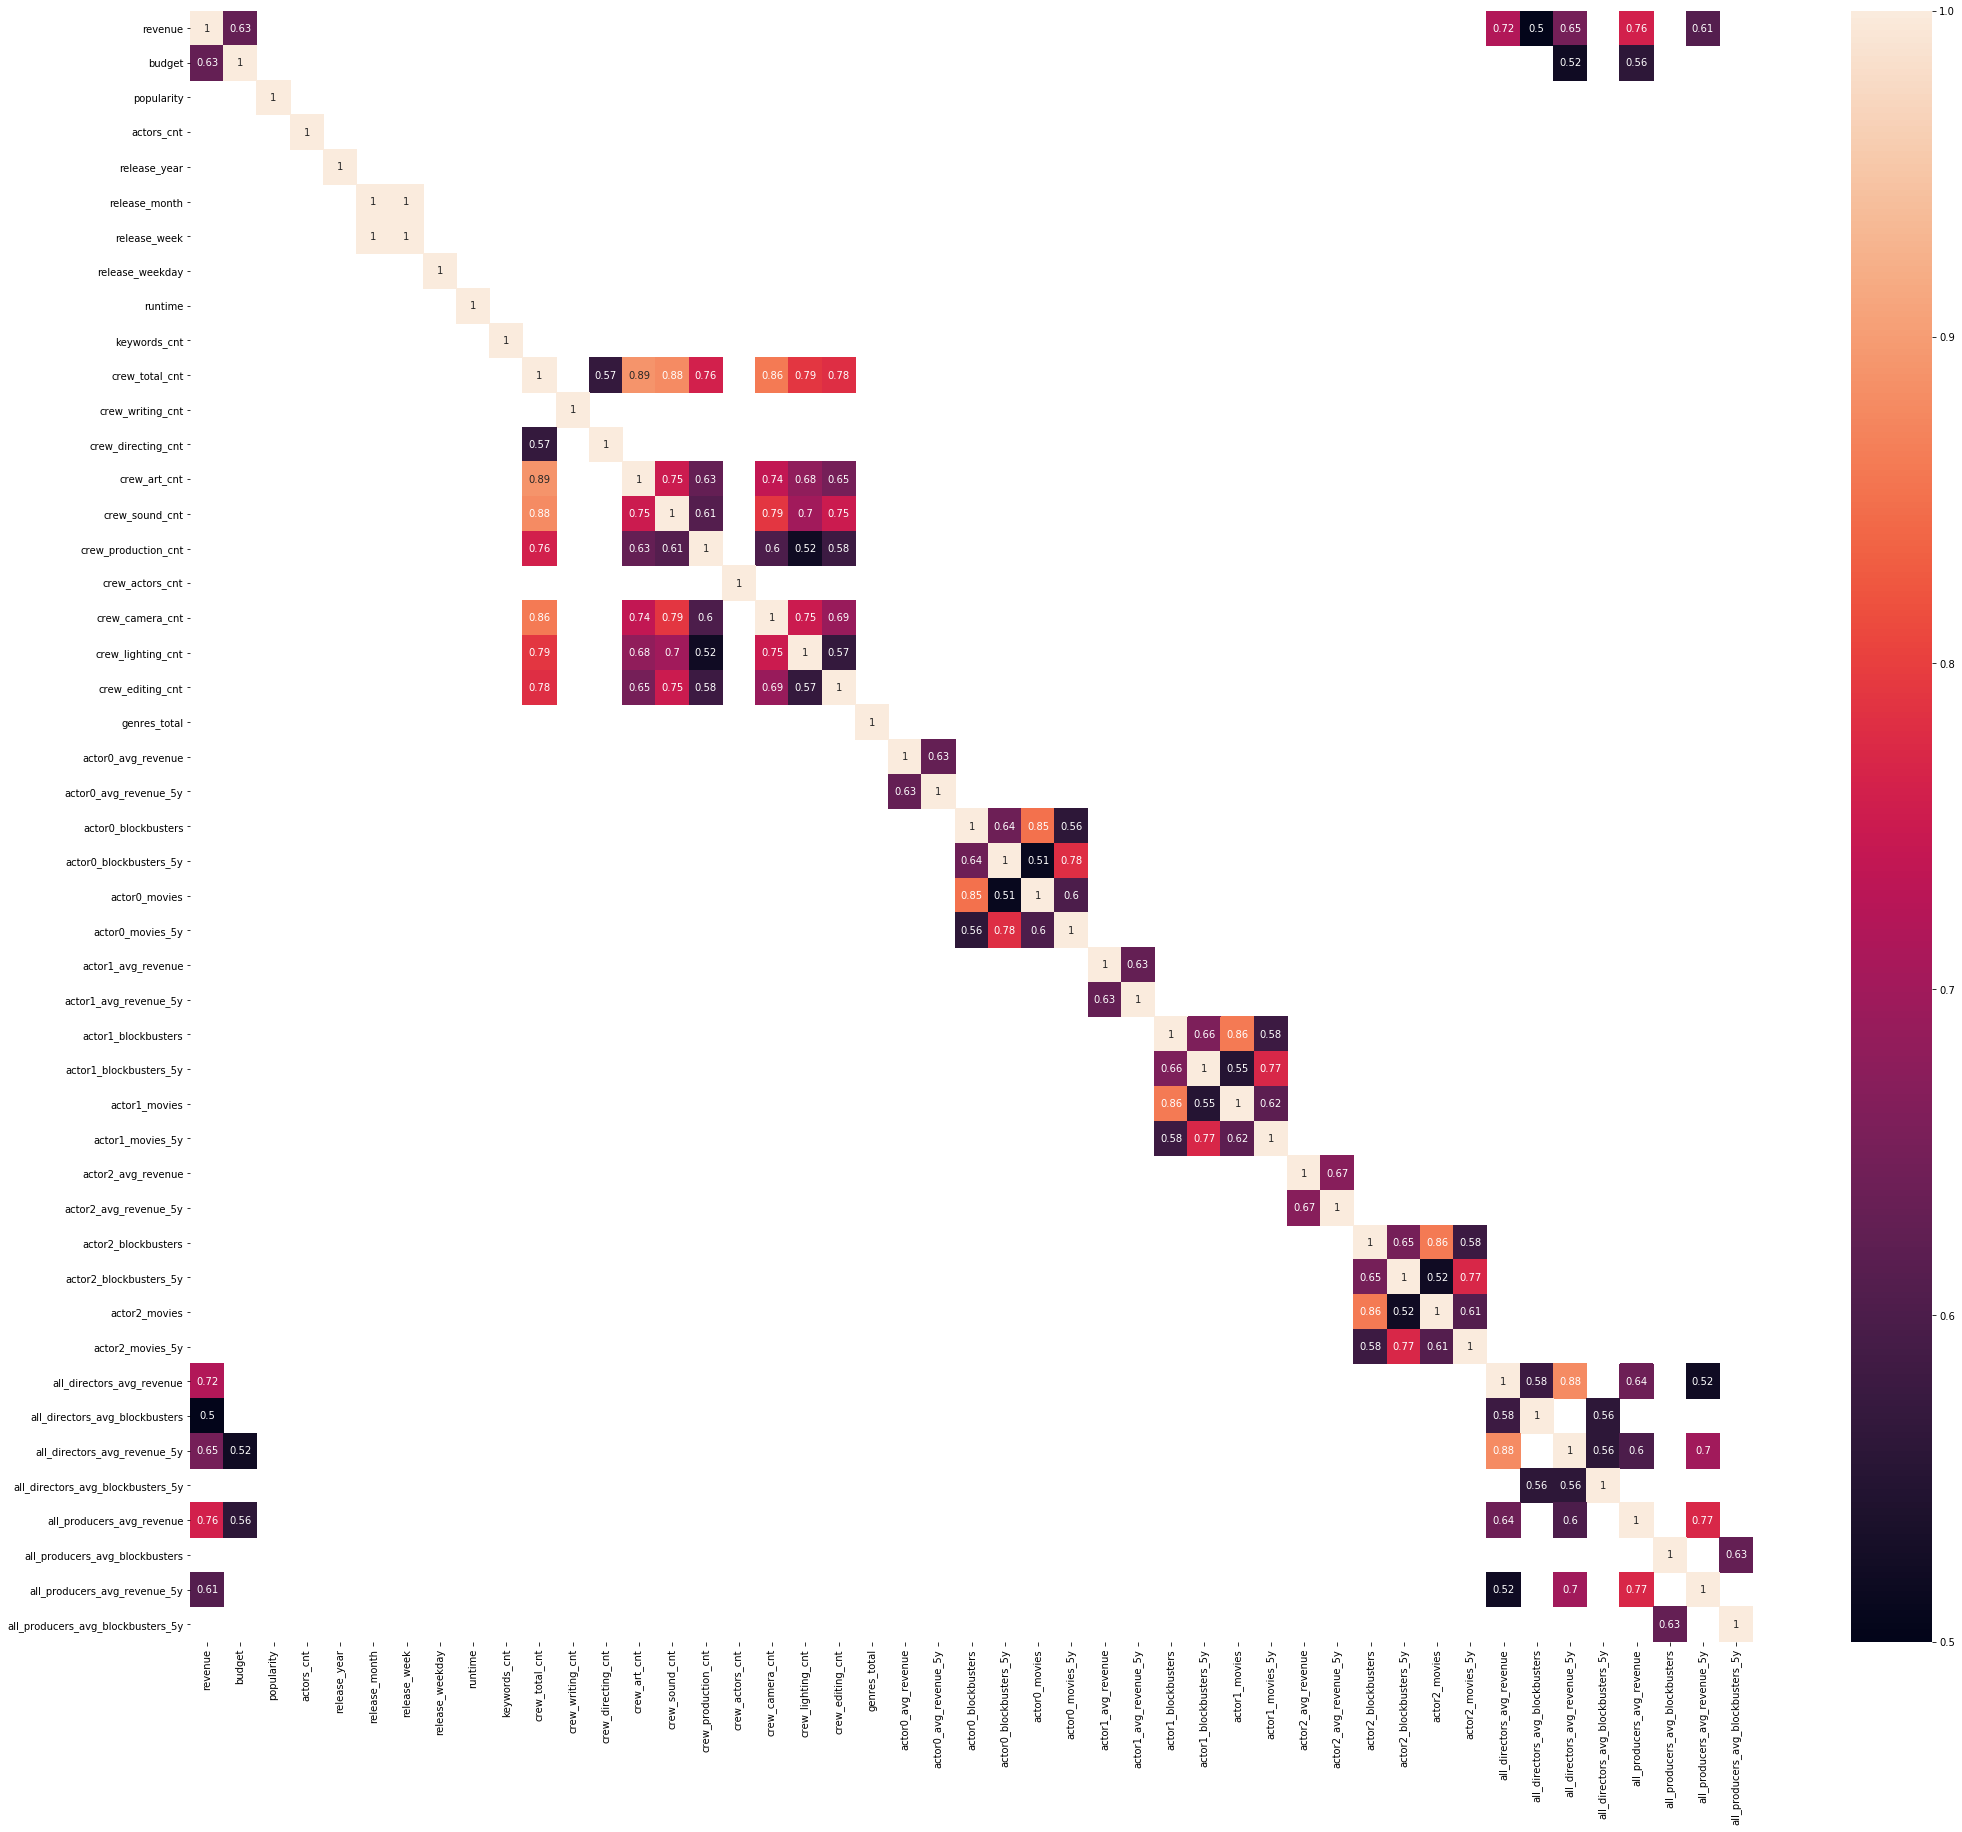

In [11]:
movies_corr_matrix = movies.corr().round(2)
kot = movies_corr_matrix[abs(movies_corr_matrix)>=.5]

plt.figure(figsize=(35,30))
sns.heatmap(kot, annot=True)
plt.show()


#### Corellation of outcome variable with all other variables: 

In [12]:
pd.set_option('display.max_rows', None)
revenue_correlations = movies[movies.columns[1:]].corr()['revenue'][:]
revenue_correlations.sort_values(ascending=False)

revenue                              1.000000
all_producers_avg_revenue            0.763644
all_directors_avg_revenue            0.717587
all_directors_avg_revenue_5y         0.654543
budget                               0.633540
all_producers_avg_revenue_5y         0.611014
all_directors_avg_blockbusters       0.502253
actor2_avg_revenue                   0.463105
actor1_avg_revenue                   0.401799
popularity                           0.383885
actor0_avg_revenue                   0.367458
all_producers_avg_blockbusters       0.353422
crew_total_cnt                       0.326929
crew_art_cnt                         0.318283
actors_cnt                           0.309669
all_directors_avg_blockbusters_5y    0.308514
actor2_avg_revenue_5y                0.291461
crew_editing_cnt                     0.285596
actor0_blockbusters                  0.270592
crew_sound_cnt                       0.261954
actor1_blockbusters                  0.256179
crew_camera_cnt                   

#### 4. Describe the target variable (revenue) - how is it distributed? 
#### Are there categories that show a large difference in the distribution of the target variable?


              Distribution of revenue all movies and inside different categories (genre, runtime, release year) 

Text(0.5, 1.0, '2010-2020')

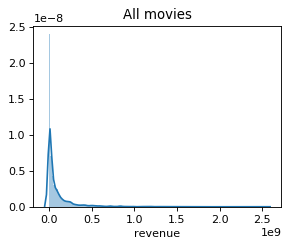

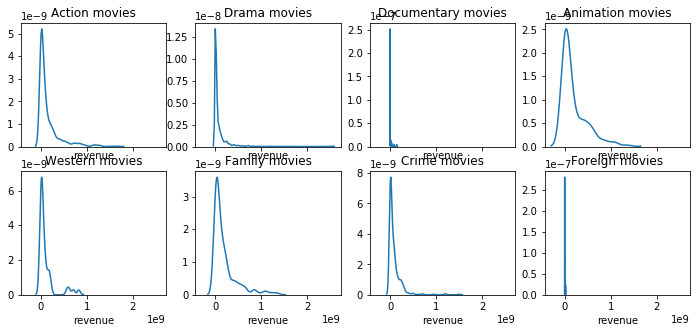

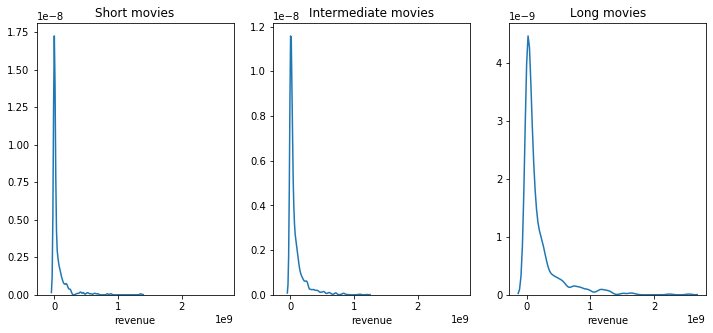

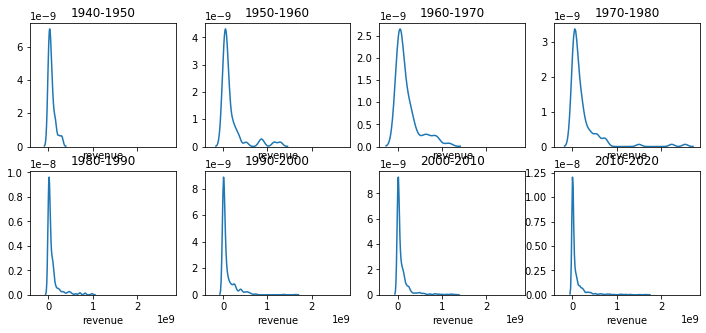

In [13]:
plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(movies.revenue, hist=True, kde=True,  bins=int(150)).set_title("All movies")

f, axes = plt.subplots(2, 4, figsize=(12, 5), sharex=True)
sns.distplot(movies.revenue[movies.sw_genre_action == 1], hist=False, kde=True, ax=axes[0,0]).set_title("Action movies")
sns.distplot(movies.revenue[movies.sw_genre_drama == 1], hist=False, kde=True, ax=axes[0,1]).set_title("Drama movies")
sns.distplot(movies.revenue[movies.sw_genre_documentary == 1], hist=False, kde=True, ax=axes[0,2]).set_title("Documentary movies")
sns.distplot(movies.revenue[movies.sw_genre_animation == 1], hist=False, kde=True, ax=axes[0,3]).set_title("Animation movies")
sns.distplot(movies.revenue[movies.sw_genre_western == 1], hist=False, kde=True, ax=axes[1,0]).set_title("Western movies")
sns.distplot(movies.revenue[movies.sw_genre_family == 1], hist=False, kde=True, ax=axes[1,1]).set_title("Family movies")
sns.distplot(movies.revenue[movies.sw_genre_crime == 1], hist=False, kde=True, ax=axes[1,2]).set_title("Crime movies")
sns.distplot(movies.revenue[movies.sw_genre_foreign == 1], hist=False, kde=True, ax=axes[1,3]).set_title("Foreign movies")

f, axes = plt.subplots(1, 3, figsize=(12, 5), sharex=True)
sns.distplot(movies.revenue[movies.runtime_cat == 'Short'], hist=False, kde=True, ax=axes[0]).set_title("Short movies")
sns.distplot(movies.revenue[movies.runtime_cat == 'Intermediate'], hist=False, kde=True, ax=axes[1]).set_title("Intermediate movies")
sns.distplot(movies.revenue[movies.runtime_cat == 'Long'], hist=False, kde=True, ax=axes[2]).set_title("Long movies")


f, axes = plt.subplots(2, 4, figsize=(12, 5), sharex=True)
sns.distplot(movies.revenue[(movies.release_year > 1940) & (movies.release_year <= 1950)], hist=False, kde=True, ax=axes[0,0]).set_title("1940-1950")
sns.distplot(movies.revenue[(movies.release_year > 1950) & (movies.release_year <= 1960)], hist=False, kde=True, ax=axes[0,1]).set_title("1950-1960")
sns.distplot(movies.revenue[(movies.release_year > 1960) & (movies.release_year <= 1970)], hist=False, kde=True, ax=axes[0,2]).set_title("1960-1970")
sns.distplot(movies.revenue[(movies.release_year > 1970) & (movies.release_year <= 1980)], hist=False, kde=True, ax=axes[0,3]).set_title("1970-1980")
sns.distplot(movies.revenue[(movies.release_year > 1980) & (movies.release_year <= 1990)], hist=False, kde=True, ax=axes[1,0]).set_title("1980-1990")
sns.distplot(movies.revenue[(movies.release_year > 1990) & (movies.release_year <= 2000)], hist=False, kde=True, ax=axes[1,1]).set_title("1990-2000")
sns.distplot(movies.revenue[(movies.release_year > 2000) & (movies.release_year <= 2010)], hist=False, kde=True, ax=axes[1,2]).set_title("2000-2010")
sns.distplot(movies.revenue[(movies.release_year > 2010) & (movies.release_year <= 2020)], hist=False, kde=True, ax=axes[1,3]).set_title("2010-2020")


Looks like distribution of revenue is Poisson and the same for different categories

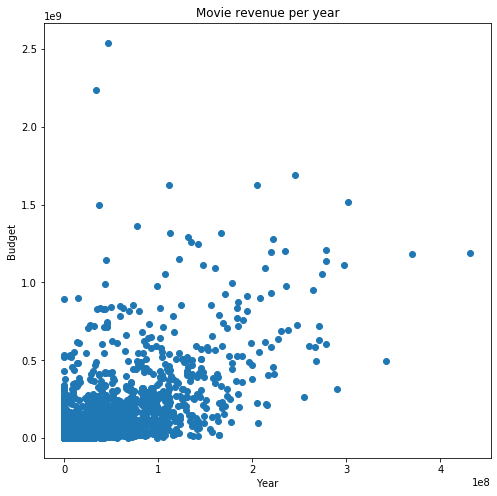

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(movies.budget, movies.revenue)
plt.title('Movie revenue per year')
plt.xlabel('Year')
plt.ylabel('Budget')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


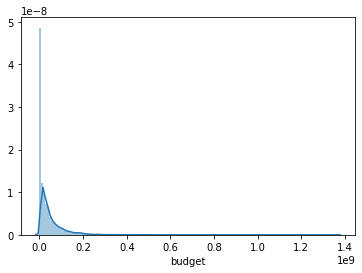

In [29]:
movies.budget_log = np.log(movies.budget)
movies.revenue_log = np.log(movies.revenue)

sns.distplot(movies.budget, hist=True, kde=True,  bins=int(150))


#### 5. Create graphs that can help you check for extreme data. Describe them.

Text(0.5, 1.0, 'Revenue')

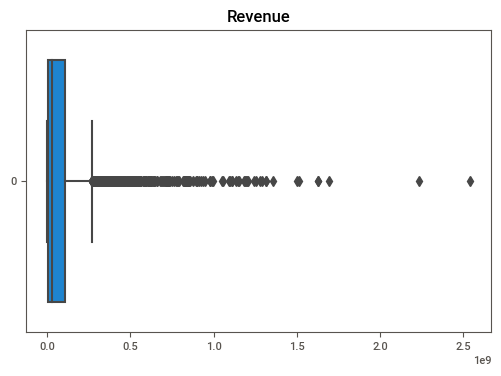

In [212]:

sns.boxplot(data=movies.revenue, orient='h').set_title("Revenue")

# The box plot shows that there are alot of outliers in the top. 
# Some movies are having a hyper big revenue compared to the rest of movies in the distribution.

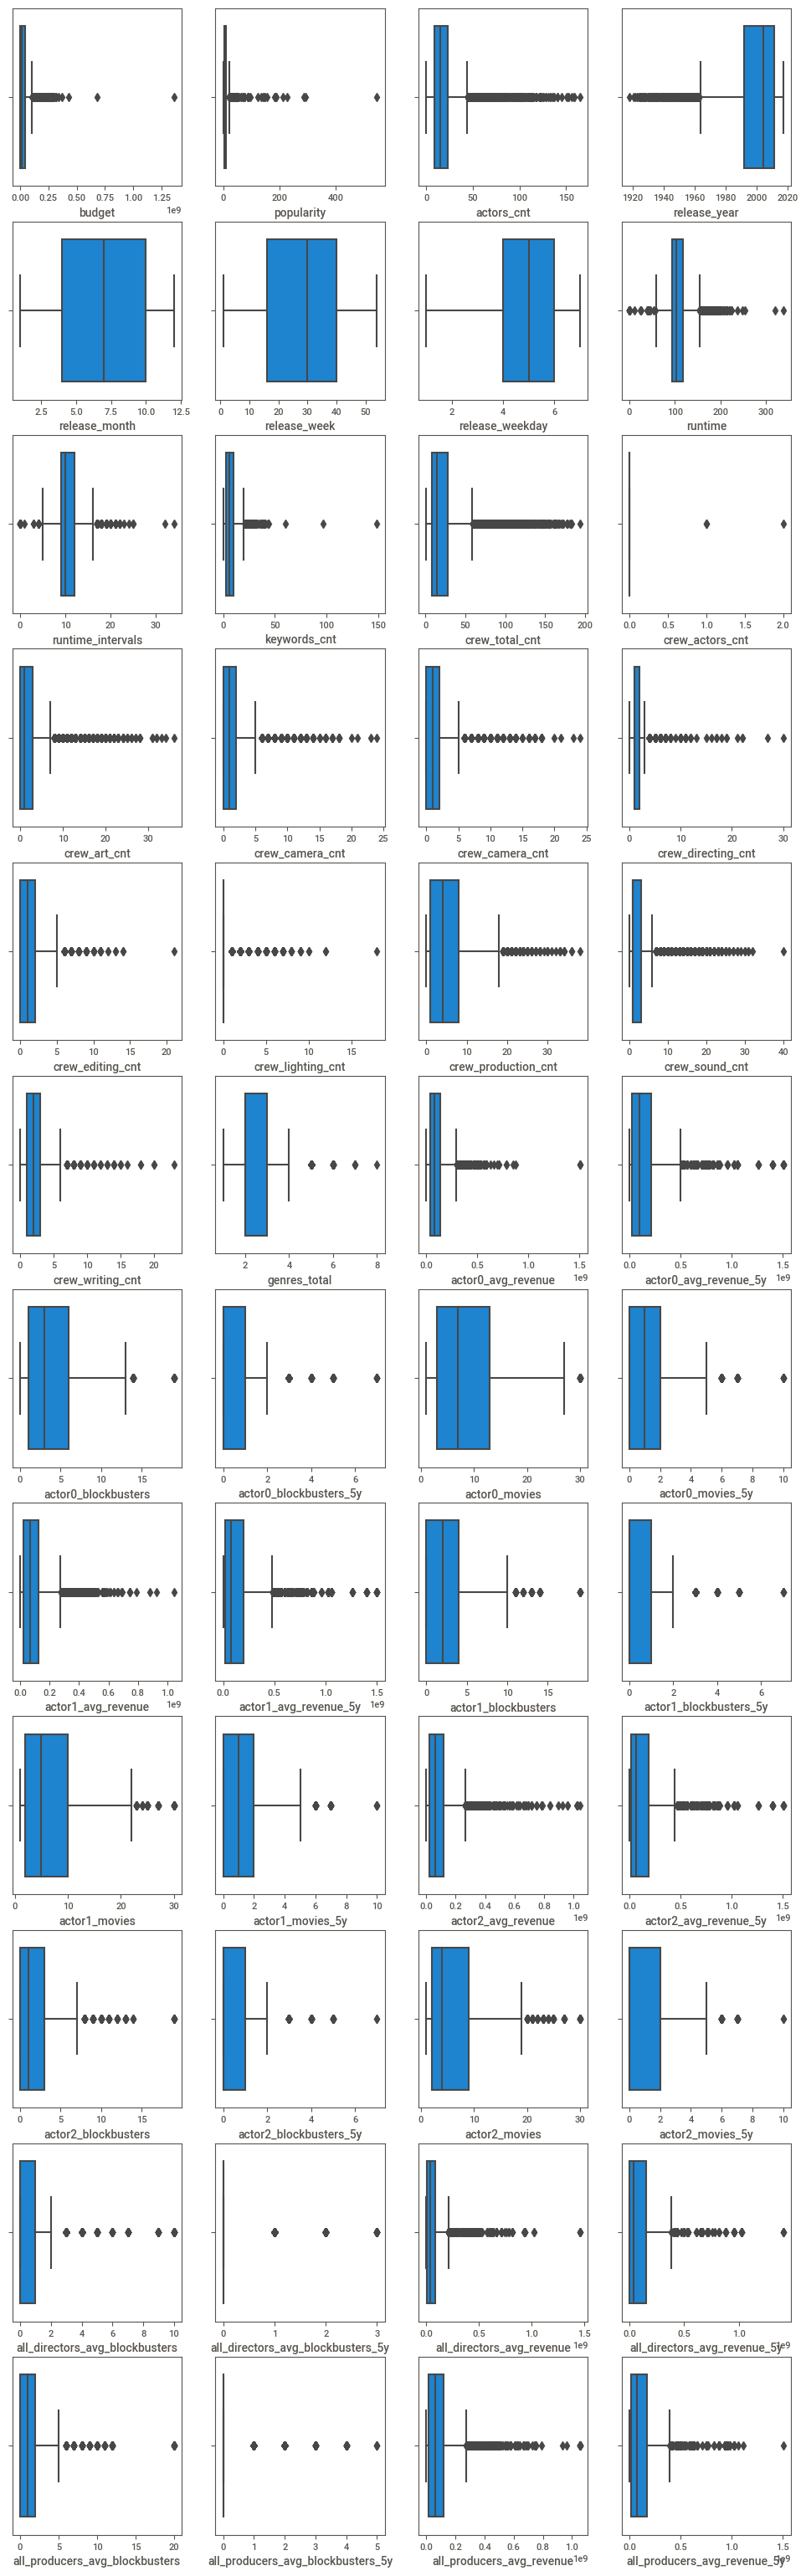

In [224]:
f, axes = plt.subplots(12, 4, figsize=(12, 40), sharex=False)
sns.boxplot(movies.budget,  ax=axes[0,0])
sns.boxplot(movies.popularity,  ax=axes[0,1])
sns.boxplot(movies.actors_cnt,  ax=axes[0,2])
sns.boxplot(movies.release_year,  ax=axes[0,3])
sns.boxplot(movies.release_month,  ax=axes[1,0])
sns.boxplot(movies.release_week,  ax=axes[1,1])
sns.boxplot(movies.release_weekday,  ax=axes[1,2])
sns.boxplot(movies.runtime,  ax=axes[1,3])

sns.boxplot(movies.runtime_intervals,  ax=axes[2,0])
sns.boxplot(movies.keywords_cnt,  ax=axes[2,1])
sns.boxplot(movies.crew_total_cnt,  ax=axes[2,2])
sns.boxplot(movies.crew_actors_cnt,  ax=axes[2,3])
sns.boxplot(movies.crew_art_cnt,  ax=axes[3,0])
sns.boxplot(movies.crew_camera_cnt,  ax=axes[3,1])
sns.boxplot(movies.crew_camera_cnt,  ax=axes[3,2])
sns.boxplot(movies.crew_directing_cnt,  ax=axes[3,3])

sns.boxplot(movies.crew_editing_cnt,  ax=axes[4,0])
sns.boxplot(movies.crew_lighting_cnt,  ax=axes[4,1])
sns.boxplot(movies.crew_production_cnt,  ax=axes[4,2])
sns.boxplot(movies.crew_sound_cnt,  ax=axes[4,3])
sns.boxplot(movies.crew_writing_cnt,  ax=axes[5,0])
sns.boxplot(movies.genres_total,  ax=axes[5,1])
sns.boxplot(movies.actor0_avg_revenue,  ax=axes[5,2])
sns.boxplot(movies.actor0_avg_revenue_5y,  ax=axes[5,3])

sns.boxplot(movies.actor0_blockbusters,  ax=axes[6,0])
sns.boxplot(movies.actor0_blockbusters_5y,  ax=axes[6,1])
sns.boxplot(movies.actor0_movies,  ax=axes[6,2])
sns.boxplot(movies.actor0_movies_5y,  ax=axes[6,3])
sns.boxplot(movies.actor1_avg_revenue,  ax=axes[7,0])
sns.boxplot(movies.actor1_avg_revenue_5y,  ax=axes[7,1])
sns.boxplot(movies.actor1_blockbusters,  ax=axes[7,2])
sns.boxplot(movies.actor1_blockbusters_5y,  ax=axes[7,3])

sns.boxplot(movies.actor1_movies,  ax=axes[8,0])
sns.boxplot(movies.actor1_movies_5y,  ax=axes[8,1])
sns.boxplot(movies.actor2_avg_revenue,  ax=axes[8,2])
sns.boxplot(movies.actor2_avg_revenue_5y,  ax=axes[8,3])
sns.boxplot(movies.actor2_blockbusters,  ax=axes[9,0])
sns.boxplot(movies.actor2_blockbusters_5y,  ax=axes[9,1])
sns.boxplot(movies.actor2_movies,  ax=axes[9,2])
sns.boxplot(movies.actor2_movies_5y,  ax=axes[9,3])

sns.boxplot(movies.all_directors_avg_blockbusters,  ax=axes[10,0])
sns.boxplot(movies.all_directors_avg_blockbusters_5y,  ax=axes[10,1])
sns.boxplot(movies.all_directors_avg_revenue,  ax=axes[10,2])
sns.boxplot(movies.all_directors_avg_revenue_5y,  ax=axes[10,3])
sns.boxplot(movies.all_producers_avg_blockbusters,  ax=axes[11,0])
sns.boxplot(movies.all_producers_avg_blockbusters_5y,  ax=axes[11,1])
sns.boxplot(movies.all_producers_avg_revenue,  ax=axes[11,2])
sns.boxplot(movies.all_producers_avg_revenue_5y,  ax=axes[11,3])


In [149]:
### 6. Describe the missing data: Which variables have missing data? Some?

na_variables = movies.isna().sum().sort_values(ascending=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(na_variables)

### There is a small number of records (~40) with missing data in "runtime", "crew_..." and "sw_genres_..."  variables.
### There is more lack of data in calculated variables like "actor0_avg_revenue" and "all_directors_avg_revenue_5y".
### It seems normal because not all director or actor participated in movie with known revenue, in special during last 5 years
 


original_title                          0
language_ja                             0
language_it                             0
language_ru                             0
is_collection                           0
language_es                             0
language_fr                             0
language_de                             0
original_language                       0
actors_cnt                              0
popularity                              0
keywords_cnt                            0
language_en                             0
runtime_cat                             0
budget                                  1
release_date                            1
release_year                            1
release_month                           1
release_week                            1
release_weekday                         1
runtime                                 6
runtime_intervals                       6
sw_genre_documentary                   23
sw_genre_drama                    

#### Missing data treatment:

budget                                  1    --  remove whole row
release_date                            1    --  remove whole row
release_year                            1    --  remove whole row
release_month                           1    --  remove whole row
release_week                            1    --  remove whole row
release_weekday                         1    --  remove whole row
runtime                                 6    --  remove whole row
runtime_intervals                       6    --  remove whole row
sw_genre_documentary                   23    --  remove whole row
sw_genre_drama                         23    --  remove whole row
sw_genre_fantasy                       23    --  remove whole row
sw_genre_foreign                       23    --  remove whole row
sw_genre_history                       23    --  remove whole row
sw_genre_horror                        23    --  remove whole row
sw_genre_music                         23    --  remove whole row
sw_genre_mystery                       23    --  remove whole row
sw_genre_science_fiction               23    --  remove whole row
sw_genre_thriller                      23    --  remove whole row
sw_genre_tv_movie                      23    --  remove whole row
sw_genre_war                           23    --  remove whole row
sw_genre_western                       23    --  remove whole row
genres_total                           23    --  remove whole row
sw_genre_romance                       23    --  remove whole row
sw_genre_crime                         23    --  remove whole row
sw_genre_family                        23    --  remove whole row
sw_genre_animation                     23    --  remove whole row
sw_genre_adventure                     23    --  remove whole row
sw_genre_action                        23    --  remove whole row
sw_genre_comedy                        23    --  remove whole row
crew_total_cnt                         38    --  remove whole row
crew_writing_cnt                       38    --  remove whole row
crew_directing_cnt                     38    --  remove whole row
crew_art_cnt                           38    --  remove whole row
crew_sound_cnt                         38    --  remove whole row
crew_costume_makeup_cnt                38    --  remove whole row
crew_visual_effects_cnt                38    --  remove whole row
crew_production_cnt                    38    --  remove whole row
crew_actors_cnt                        38    --  remove whole row
crew_camera_cnt                        38    --  remove whole row
crew_lighting_cnt                      38    --  remove whole row
crew_editing_cnt                       38    --  remove whole row
actor0_gender                        1464    --  replace with 0
actor0_movies                        1464    --  replace with 0
actor0_blockbusters_5y               1464    --  replace with 0
actor0_movies_5y                     1464    --  replace with 0
actor0_avg_revenue                   1464    --  replace with 0
actor0_blockbusters                  1464    --  replace with 0
actor1_movies_5y                     1520    --  replace with 0
actor1_avg_revenue                   1520    --  replace with 0
actor1_blockbusters                  1520    --  replace with 0
actor1_blockbusters_5y               1520    --  replace with 0
actor1_movies                        1520    --  replace with 0
actor1_gender                        1520    --  replace with 0
actor2_gender                        1662    --  replace with 0
actor2_movies_5y                     1662    --  replace with 0
actor2_movies                        1662    --  replace with 0
actor2_blockbusters_5y               1662    --  replace with 0
actor2_avg_revenue                   1662    --  replace with 0
actor2_blockbusters                  1662    --  replace with 0
all_directors_avg_blockbusters       1885    --  replace with 0
all_directors_avg_blockbusters_5y    1885    --  replace with 0
all_directors_avg_revenue            1885    --  replace with 0
all_producers_avg_revenue            2440    --  replace with 0
all_producers_avg_blockbusters       2440    --  replace with 0
all_producers_avg_blockbusters_5y    2440    --  replace with 0
actor0_avg_revenue_5y                3810    --  replace with 0
actor1_avg_revenue_5y                4237    --  replace with 0
revenue                              4398    --  replace with 0
actor2_avg_revenue_5y                4553    --  replace with 0
all_producers_avg_revenue_5y         4904    --  replace with 0
all_directors_avg_revenue_5y         5741    --  replace with 0

In [150]:
#### 7. Create a matrix of gaps (create a dataframe with the same dimensions from the source table and cells that are missing put a value of one and those that have data have a zero value). 
#### Show the matrix in the heatmap graph.

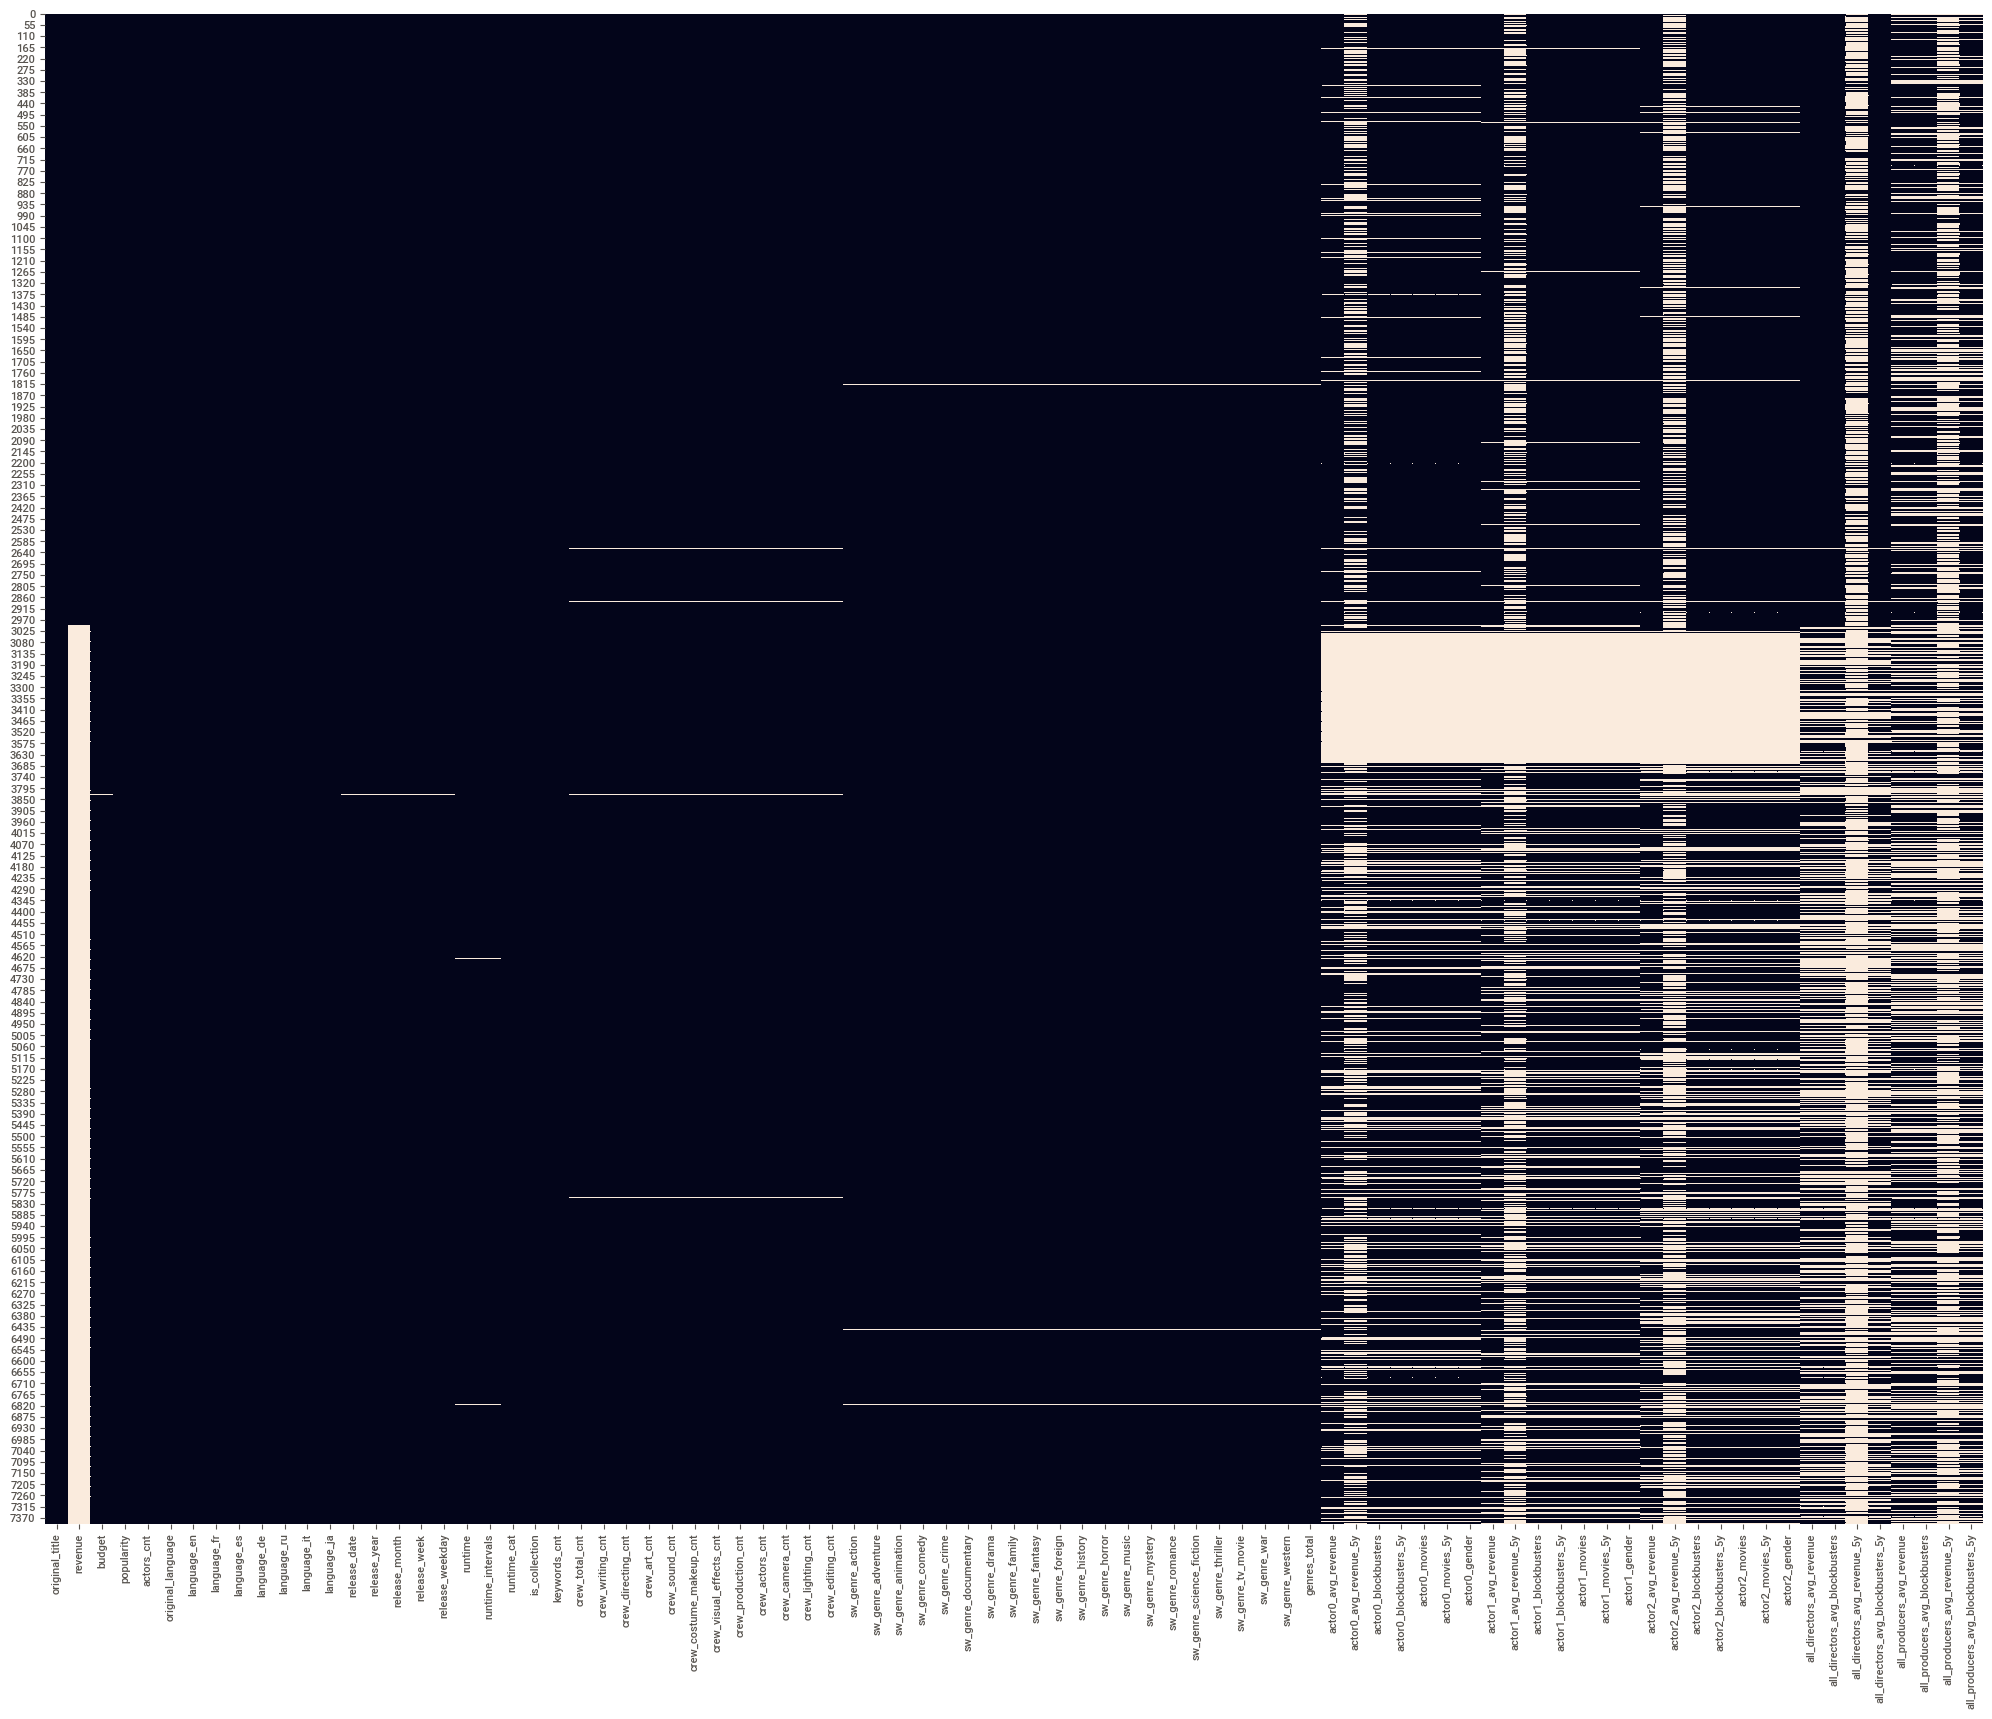

In [154]:


### pip install missingno
import missingno as msno

### plot the missingness (nullity) matrix
plt.figure(figsize=(25,20))
sns.heatmap(movies.isnull(), cbar=False)



There are a very little amount of data without values in the left side of the map, I will delete those rows.
In the right side there are many missing values because most those variables are calculated based on revenue that have a lot of missing values. This missing values will be replaced with 0.

### Clearing the Data


####   Extreme data




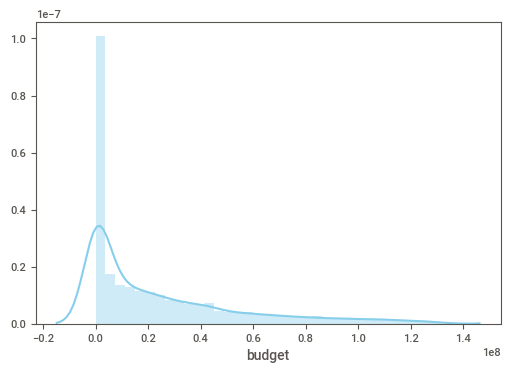

In [177]:
revenue_budget_05 = movies[['revenue', 'budget']].copy()
revenue_budget_05 = revenue_budget_05[revenue_budget_05.budget.between(revenue_budget_05.budget.quantile(.05), revenue_budget_05.budget.quantile(.95))]          

sns.distplot(revenue_budget_05.budget , color="skyblue")


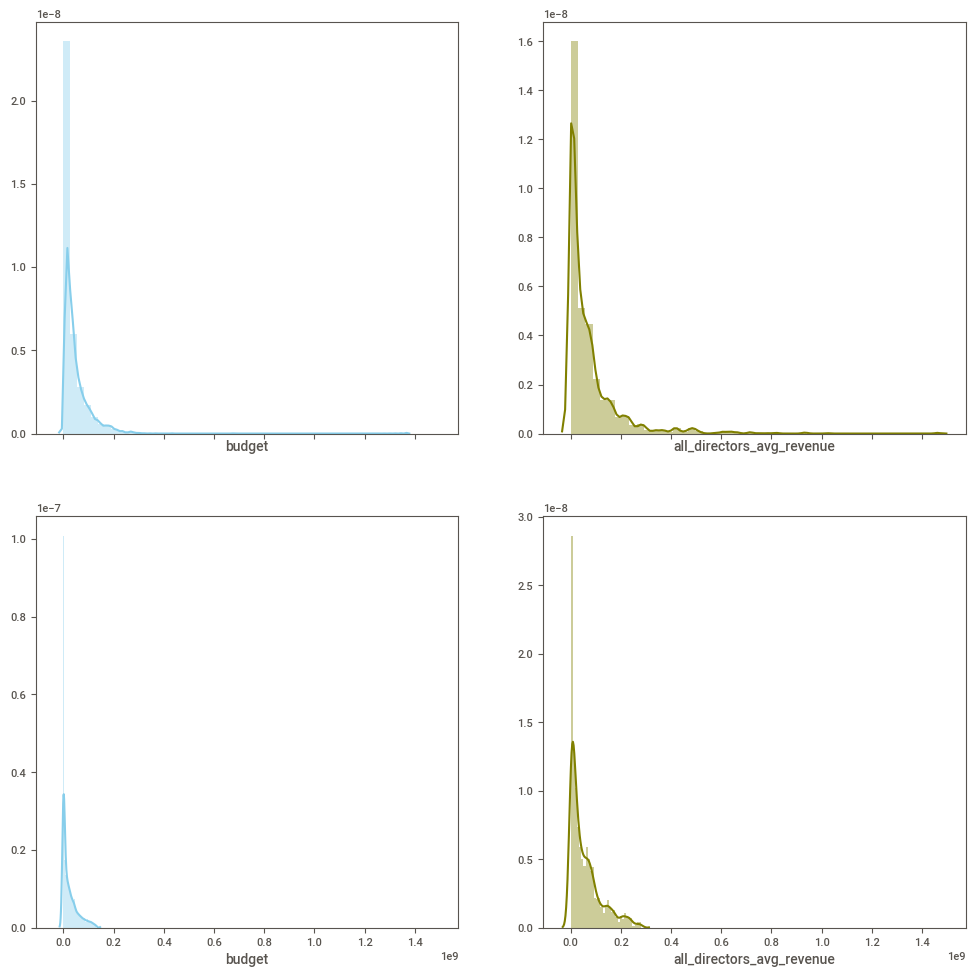

In [180]:
###### 1. In variables where extreme values are found, check the distribution of the variable with and without the extreme values. 
### Does the distribution change?


### Distribution of original budget and 'all directors average revenue'
### Distribution of budget and 'all directors average revenue' without outliers (filtered first and last 5%)

revenue_budget_05 = movies[['revenue', 'budget']].copy()
revenue_budget_05 = revenue_budget_05[revenue_budget_05.budget.between(revenue_budget_05.budget.quantile(.05), revenue_budget_05.budget.quantile(.95))]  
revenue_all_directors_avg_revenue_05 = movies[['revenue', 'all_directors_avg_revenue']].copy()
revenue_all_directors_avg_revenue_05 = revenue_all_directors_avg_revenue_05[revenue_all_directors_avg_revenue_05.all_directors_avg_revenue.between(revenue_all_directors_avg_revenue_05.all_directors_avg_revenue.quantile(.05), revenue_all_directors_avg_revenue_05.all_directors_avg_revenue.quantile(.95))]  

f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True)
sns.distplot(movies.budget , color="skyblue", ax=axes[0,0])
sns.distplot(movies.all_directors_avg_revenue , color="olive", ax=axes[0,1])
sns.distplot(revenue_budget_05.budget , color="skyblue", ax=axes[1,0])
sns.distplot(revenue_all_directors_avg_revenue_05.all_directors_avg_revenue , color="olive", ax=axes[1,1])



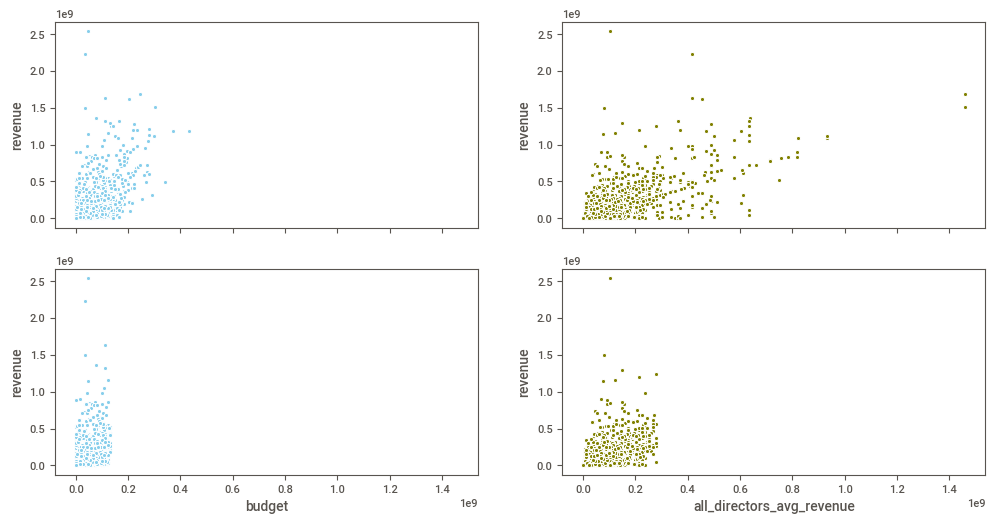

In [183]:
## 2. Create a scatter graph with the variables in the previous question in X and the target variable in Y. 
### Do extreme values in variable X affect the behavior of variable Y? Do you see differences with or without extreme values?

f, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=True)
sns.scatterplot(data = movies, x="budget", y="revenue" , color="skyblue", ax=axes[0,0])
sns.scatterplot(data = movies, x="all_directors_avg_revenue", y="revenue" , color="olive", ax=axes[0,1])
sns.scatterplot(data = revenue_budget_05, x="budget", y="revenue" , color="skyblue", ax=axes[1,0])
sns.scatterplot(data = revenue_all_directors_avg_revenue_05, x="all_directors_avg_revenue", y="revenue" , color="olive", ax=axes[1,1])

Looks like there isn't a lot correlation between outliers in different variables, creaning outliers of budget doesn't clean the 
outliers of revenue

In [ ]:
### 3. In what variables would you delete the extreme values? How would you delete them? Necrosis.

### ???


In [ ]:
### 4. Act on the data according to what you defined in the previous question.



In [ ]:
### Missing data
### For each variable with missing data, you will see the distribution of other variables with or without missing. 
### Use the missing matrix you created in part 2, question 7 for the missing / no indication. 
### For the distribution, use a histogram or density graph with category / color as indicated.

movies_nan_free = movies[['crew_total_cnt', 'genres_total']].copy()
movies_nan_free = movies_nan_free.dropna()
movies_nan_free.genres_total = movies_nan_free.genres_total.astype(int)

f, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=False)
sns.distplot(movies.crew_total_cnt, hist=False, color="skyblue", ax=axes[0,0])
sns.distplot(movies_nan_free.crew_total_cnt, hist=False, color="skyblue", ax=axes[0,1])
sns.distplot(movies.genres_total, hist=False, color="olive", ax=axes[1,0])
sns.distplot(movies_nan_free.genres_total, hist=False, color="olive", ax=axes[1,1])

### 

In [ ]:
movies = movies.dropna(subset=['crew_total_cnt','crew_writing_cnt','crew_directing_cnt','crew_art_cnt','crew_sound_cnt','crew_costume_makeup_cnt','crew_visual_effects_cnt','crew_production_cnt','crew_actors_cnt','crew_camera_cnt','crew_lighting_cnt','crew_editing_cnt'])
movies = movies.dropna(subset=['sw_genre_action','sw_genre_adventure','sw_genre_animation','sw_genre_comedy','sw_genre_crime','sw_genre_documentary','sw_genre_drama','sw_genre_family','sw_genre_fantasy','sw_genre_foreign','sw_genre_history','sw_genre_horror','sw_genre_music','sw_genre_mystery','sw_genre_romance','sw_genre_science_fiction','sw_genre_thriller','sw_genre_tv_movie','sw_genre_war','sw_genre_western','genres_total'])

movies = movies.fillna(0)



In [ ]:


movies.original_language = pd.Categorical(movies.original_language)
movies.language_en = pd.Categorical(movies.language_en)
movies.language_fr = pd.Categorical(movies.language_fr)
movies.language_es = pd.Categorical(movies.language_es)
movies.language_de = pd.Categorical(movies.language_de)
movies.language_ru = pd.Categorical(movies.language_ru)
movies.language_it = pd.Categorical(movies.language_it)
movies.language_ja = pd.Categorical(movies.language_ja)
movies.runtime_intervals = pd.Categorical(movies.runtime_intervals)
movies.runtime_cat = pd.Categorical(movies.runtime_cat)
movies.is_collection = pd.Categorical(movies.is_collection)
movies.sw_genre_action = pd.Categorical(movies.sw_genre_action)
movies.sw_genre_adventure = pd.Categorical(movies.sw_genre_adventure)
movies.sw_genre_animation = pd.Categorical(movies.sw_genre_animation)
movies.sw_genre_comedy = pd.Categorical(movies.sw_genre_comedy)
movies.sw_genre_crime = pd.Categorical(movies.sw_genre_crime)
movies.sw_genre_documentary = pd.Categorical(movies.sw_genre_documentary)
movies.sw_genre_drama = pd.Categorical(movies.sw_genre_drama)
movies.sw_genre_family = pd.Categorical(movies.sw_genre_family)
movies.sw_genre_fantasy = pd.Categorical(movies.sw_genre_fantasy)
movies.sw_genre_foreign = pd.Categorical(movies.sw_genre_foreign)
movies.sw_genre_history = pd.Categorical(movies.sw_genre_history)
movies.sw_genre_horror = pd.Categorical(movies.sw_genre_horror)
movies.sw_genre_music = pd.Categorical(movies.sw_genre_music)
movies.sw_genre_mystery = pd.Categorical(movies.sw_genre_mystery)
movies.sw_genre_romance = pd.Categorical(movies.sw_genre_romance)
movies.sw_genre_science_fiction = pd.Categorical(movies.sw_genre_science_fiction)
movies.sw_genre_thriller = pd.Categorical(movies.sw_genre_thriller)
movies.sw_genre_tv_movie = pd.Categorical(movies.sw_genre_tv_movie)
movies.sw_genre_war = pd.Categorical(movies.sw_genre_war)
movies.sw_genre_western = pd.Categorical(movies.sw_genre_western)
movies.actor0_gender = pd.Categorical(movies.actor0_gender)
movies.actor1_gender = pd.Categorical(movies.actor1_gender)
movies.actor2_gender = pd.Categorical(movies.actor2_gender)

movies.release_year = movies.release_year.astype(int)
movies.release_month = movies.release_month.astype(int)
movies.release_week = movies.release_week.astype(int)
movies.release_weekday = movies.release_weekday.astype(int)
movies.runtime = movies.runtime.astype(int)
movies.crew_total_cnt = movies.crew_total_cnt.astype(int)
movies.crew_actors_cnt = movies.crew_actors_cnt.astype(int)
movies.crew_art_cnt = movies.crew_art_cnt.astype(int)
movies.crew_camera_cnt = movies.crew_camera_cnt.astype(int)
movies.crew_costume_makeup_cnt = movies.crew_costume_makeup_cnt.astype(int)
movies.crew_directing_cnt = movies.crew_directing_cnt.astype(int)
movies.crew_editing_cnt = movies.crew_editing_cnt.astype(int)
movies.crew_lighting_cnt = movies.crew_lighting_cnt.astype(int)
movies.crew_production_cnt = movies.crew_production_cnt.astype(int)
movies.crew_sound_cnt = movies.crew_sound_cnt.astype(int)
movies.crew_visual_effects_cnt = movies.crew_visual_effects_cnt.astype(int)
movies.crew_writing_cnt = movies.crew_writing_cnt.astype(int)
movies.genres_total = movies.genres_total.astype(int)
movies.actor0_movies = movies.actor0_movies.astype(int)
movies.actor0_movies_5y = movies.actor0_movies_5y.astype(int)
movies.actor0_blockbusters = movies.actor0_blockbusters.astype(int)
movies.actor0_blockbusters_5y = movies.actor0_blockbusters_5y.astype(int)
movies.actor1_movies = movies.actor1_movies.astype(int)
movies.actor1_movies_5y = movies.actor1_movies_5y.astype(int)
movies.actor1_blockbusters = movies.actor1_blockbusters.astype(int)
movies.actor1_blockbusters_5y = movies.actor1_blockbusters_5y.astype(int)
movies.actor2_movies = movies.actor2_movies.astype(int)
movies.actor2_movies_5y = movies.actor2_movies_5y.astype(int)
movies.actor2_blockbusters = movies.actor2_blockbusters.astype(int)
movies.actor2_blockbusters_5y = movies.actor2_blockbusters_5y.astype(int)
movies.all_directors_avg_blockbusters = movies.all_directors_avg_blockbusters.astype(int)
movies.all_directors_avg_blockbusters_5y = movies.all_directors_avg_blockbusters_5y.astype(int)
movies.all_producers_avg_blockbusters= movies.all_producers_avg_blockbusters.astype(int)
movies.all_producers_avg_blockbusters_5y = movies.all_producers_avg_blockbusters_5y.astype(int)

